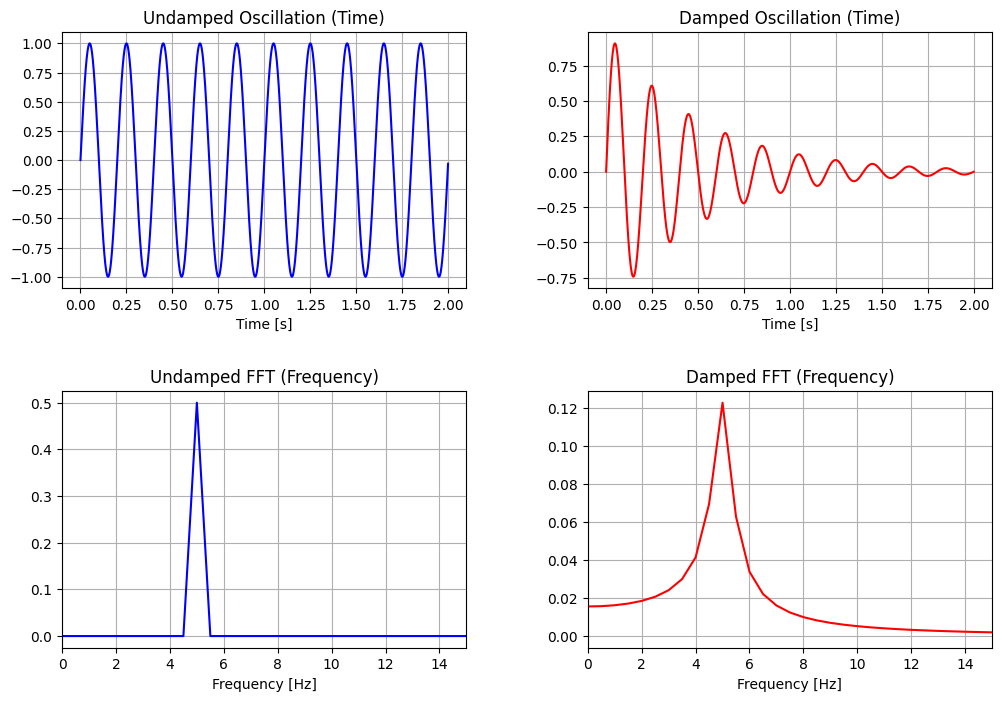

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000                # Sampling frequency (Hz)
t = np.arange(0, 2, 1/fs) # Time vector (2 seconds)
f0 = 5                   # Frequency of oscillation (Hz)
decay_constant = 2       # Damping factor

# 1. Time Domain Signals
# Undamped: A simple sine wave
y_undamped = np.sin(2 * np.pi * f0 * t)

# Damped: Sine wave multiplied by an exponential decay
y_damped = np.exp(-decay_constant * t) * np.sin(2 * np.pi * f0 * t)

# 2. Frequency Domain (FFT)
def get_fft(signal, fs):
    n = len(signal)
    freq = np.fft.rfftfreq(n, d=1/fs)
    magnitude = np.abs(np.fft.rfft(signal)) / n
    return freq, magnitude

freq_un, mag_un = get_fft(y_undamped, fs)
freq_damp, mag_damp = get_fft(y_damped, fs)

# 3. Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Time Domain Plots
axs[0, 0].plot(t, y_undamped, color='blue')
axs[0, 0].set_title("Undamped Oscillation (Time)")
axs[0, 0].set_xlabel("Time [s]")
axs[0, 0].grid(True)

axs[0, 1].plot(t, y_damped, color='red')
axs[0, 1].set_title("Damped Oscillation (Time)")
axs[0, 1].set_xlabel("Time [s]")
axs[0, 1].grid(True)

# Frequency Domain Plots
axs[1, 0].plot(freq_un, mag_un, color='blue')
axs[1, 0].set_title("Undamped FFT (Frequency)")
axs[1, 0].set_xlim(0, 15) # Zoom in on the spike
axs[1, 0].set_xlabel("Frequency [Hz]")
axs[1, 0].grid(True)

axs[1, 1].plot(freq_damp, mag_damp, color='red')
axs[1, 1].set_title("Damped FFT (Frequency)")
axs[1, 1].set_xlim(0, 15) # Zoom in to see the broadening
axs[1, 1].set_xlabel("Frequency [Hz]")
axs[1, 1].grid(True)

plt.show()